In [1]:
import numpy as np
import aurora.autodiff as ad
import aurora.datasets as data
from aurora.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sbn;
sbn.set()

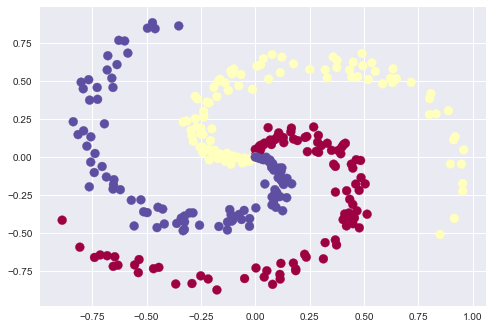

In [2]:
D = 2
H = 150
K = 3
N = 100

X_data, y_data, y_data_encoded = data.spiral(K, D, N, 0)

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=80, cmap=plt.cm.Spectral)
plt.show()

iter:     0 cost:  1.09861
iter:   100 cost:  0.81821
iter:   200 cost:  0.78675
iter:   300 cost:  0.77920
iter:   400 cost:  0.77680
iter:   500 cost:  0.77592
iter:   600 cost:  0.77558
iter:   700 cost:  0.77544
iter:   800 cost:  0.77538
iter:   900 cost:  0.77535
iter:  1000 cost:  0.77534
iter:  1100 cost:  0.77534
iter:  1200 cost:  0.77533
prediction accuracy: 49.33


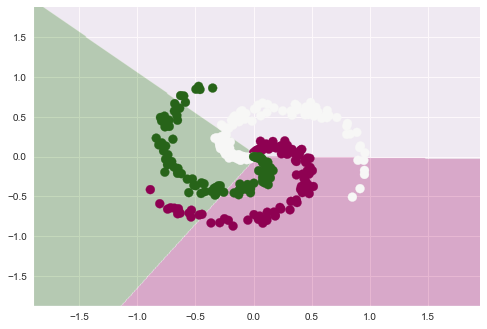

In [3]:
X = ad.Variable(name="x")
y = ad.Variable(name='y')

W = ad.Parameter(name="W", init=np.zeros((D, K)))
b = ad.Parameter(name="b", init=np.zeros(K))

z = ad.matmul(X, W)
hid_1 = z + ad.broadcast_to(b, z)
loss = ad.cross_entropy(hid_1, y)

n_epoch = 1201
lr = 0.001

optimizer = SGD(loss, params=[W, b], lr=lr, momentum=0.0)

for i in range(n_epoch):
    loss_now = optimizer.step(feed_dict={X: X_data, y: y_data_encoded})
    if i % 100 == 0:
        fmt_str = 'iter: {0:>5d} cost: {1:>8.5f}'
        print(fmt_str.format(i, loss_now[0]))

prob = ad.softmax(hid_1)
executor = ad.Executor([prob])
prob_val, = executor.run(feed_dict={X: X_data})

correct = np.sum(np.equal(y_data, np.argmax(prob_val, axis=1)))
print('prediction accuracy: {0:>.2f}'.format(correct / (N * K) * 100))

size = 0.01
x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, size), np.arange(y_min, y_max, size))
Z = np.stack((xx.ravel(), yy.ravel()), axis=1)

prob_values, = executor.run(feed_dict={X: Z})

Z = np.argmax(prob_values, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.PiYG, alpha=0.3, antialiased=True)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=80, cmap=plt.cm.PiYG)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()